In [17]:
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os

In [18]:
import zipfile
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/brondolan')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
#Daftar sub-direktori
subdirectories = ['test', 'train', 'valid']

#Loop melalui setiap sub-direktori
for subdir in subdirectories:
    subdir_path = os.path.join('/content/drive/MyDrive/brondolan', subdir)

    #List semua file gambar di sub-direktori
    image_files = [file for file in os.listdir(subdir_path) if file.lower().endswith(('.png', '.jpg', '.jpeg'))]

    #Tampilkan setiap gambar
    for image_file in image_files:
        image_path = os.path.join(subdir_path, image_file)
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.title(os.path.join(subdir, image_file))
        plt.show()
#Cetak jalur saat ini
print("Current Directory:", os.getcwd())

#Cetak isi direktori "brondolan"
print("Contents of brondolan:", os.listdir('/content/drive/MyDrive/brondolan'))

#Cetak isi sub-direktori "test"
print("Contents of test:", os.listdir('/content/drive/MyDrive/brondolan/test'))

Current Directory: /content/drive/MyDrive/brondolan
Contents of brondolan: ['test', 'train', 'valid', 'Copy of IMG_20231206_151230.jpg', 'WhatsApp Image 2023-12-09 at 00.27.53.jpeg', 'model-sawit.h5', 'download (1).jpeg', 'images.jpeg', 'images (1).jpeg']
Contents of test: ['ripe', 'unripe']


In [21]:
training = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testing = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

training_generator = training.flow_from_directory(
    '/content/drive/MyDrive/brondolan/train',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)
testing_generator = training.flow_from_directory(
    '/content/drive/MyDrive/brondolan/test',
    target_size=(150, 150),
    shuffle=True,
    class_mode='binary',
)

Found 400 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [22]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')
base_model.trainable = False
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 5, 5, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_2 (Dense)             (None, 64)                81984     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 2340033 (8.93 MB)
Trainable params: 8204

In [25]:
history = model.fit(training_generator, validation_data=testing_generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 [==============================] - 83s 6s/step - loss: 0.5376 - accuracy: 0.7450 - val_loss: 0.0672 - val_accuracy: 0.9833
Epoch 2/50
13/13 [==============================] - 75s 6s/step - loss: 0.1387 - accuracy: 0.9575 - val_loss: 0.0481 - val_accuracy: 0.9833
Epoch 3/50
13/13 [==============================] - 83s 7s/step - loss: 0.0885 - accuracy: 0.9725 - val_loss: 0.0500 - val_accuracy: 0.9833
Epoch 4/50
13/13 [==============================] - 75s 6s/step - loss: 0.0598 - accuracy: 0.9800 - val_loss: 0.0242 - val_accuracy: 0.9833
Epoch 5/50
13/13 [==============================] - 77s 6s/step - loss: 0.0509 - accuracy: 0.9900 - val_loss: 0.0081 - val_accuracy: 1.0000
Epoch 6/50
13/13 [==============================] - 74s 6s/step - loss: 0.0349 - accuracy: 0.9925 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/50
13/13 [==============================] - 85s 7s/step - loss: 0.0342 - accuracy: 0.9900 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 8/50
13/13 [=============

13/13 - 69s - loss: 1.8456e-04 - accuracy: 1.0000 - 69s/epoch - 5s/step


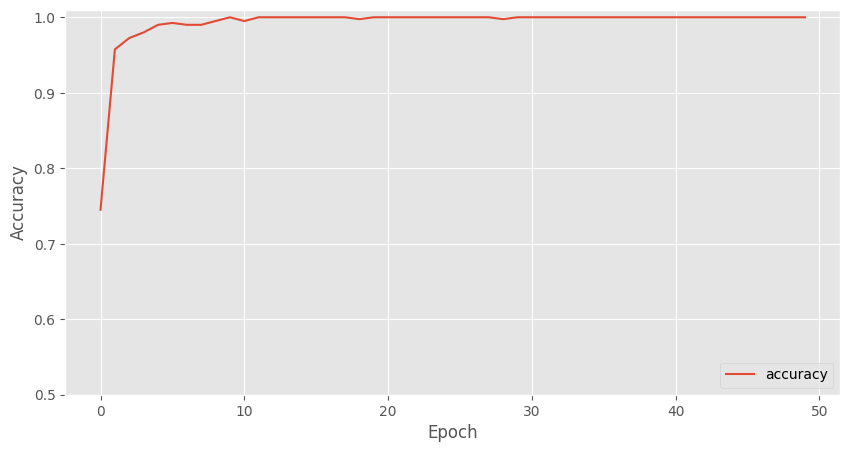

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(training_generator, verbose=2)

In [27]:
result = model.evaluate(training_generator)

13/13 [==============================] - 61s 5s/step - loss: 1.8456e-04 - accuracy: 1.0000


Saving 1701871739023.jpg to 1701871739023.jpg
1/1 [==============================] - 0s 32ms/step
0.002561944
Ripe - Matang, Kemiripan: 100%


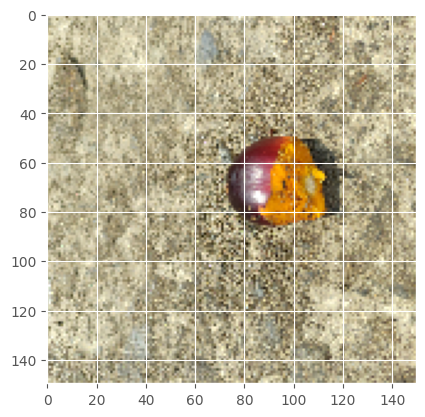

In [29]:
from google.colab import files

image_data = files.upload()
image_file = list(image_data.keys())[0]
image = tf.keras.utils.load_img(image_file, target_size=(150, 150))
image_array = tf.keras.utils.img_to_array(image)
image_array = image_array / 255.
image_array = np.array([image_array])
result_predict = model.predict(image_array)[0][0]
print(result_predict)
if(result_predict > 0.5):
  print(f'Unripe - Mentah, Kemiripan: {int(result_predict * 100)}%')
else:
  print(f'Ripe - Matang, Kemiripan: {100 - int(result_predict * 100)}%')
plt.imshow(image)
plt.show()

In [ ]:
model.save('model-sawit.h5')